Text(0, 0.5, 'Melt rate [m/yr]')

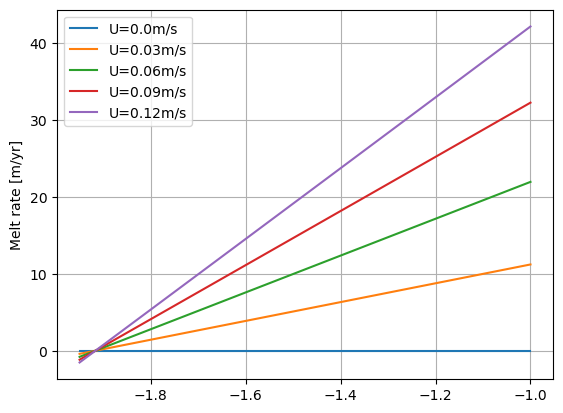

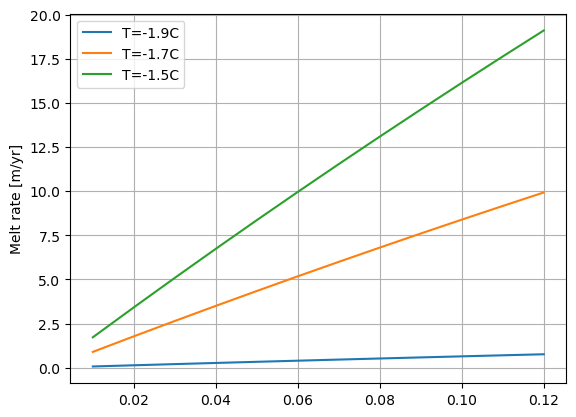

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

# Constants, from Jenkins
rho_i=916
L_i=334000
rho_ic_i_k_i=2.1
rho_w=1030
c_w=3974
c_i=2108 # from internet, not in Jenkins tables

gamma_1=-0.0573
gamma_2=0.0832
gamma_3=-7.53*10**-8

CdTt=0.0011 # Thermal Stanton
CdTs=3.1*10**-5 # Diffusion Stanton number
CdTts=5.9*10**-4 # Stanton number - not used?
Cd=0.0097
Tt=0.011
Ts=3.1*10**-4
Tts=0.006

# Fixed values
T_i=-20
S_w=34.9
Pb=400


# Constants, Elin
A=rho_i*L_i
B=rho_i*c_i*T_i #
C=rho_i*c_i  # 
D=rho_w*c_w*CdTt
E=rho_w*CdTs
F=gamma_2+gamma_3*Pb

# a is melt/second! multiply by numbers of seconds per year to get m/yr
N=365*24*3600

fig,ax=plt.subplots()

for U in np.linspace(0,0.12,5):
    TT=np.linspace(-1.95,-1,25)
    aa=[]
    for i,T in enumerate(TT):
        a = sympy.Symbol('a')
        f1=(B-A)*a-C*a*(gamma_1*S_w*E/(E+rho_i*a)+F)-D*U*(gamma_1*S_w*E/(E+rho_i*a)+F)+D*U*T
        aa.append(N*sympy.nsolve(f1,a,1/N))
    ax.plot(TT,aa,label='U='+str(U)+'m/s')
ax.legend()
ax.grid()   
ax.set_ylabel('Melt rate [m/yr]')


fig,ax=plt.subplots()
for T in [-1.9,-1.7,-1.5]:
    UU=np.linspace(0.01,0.12,12)
    aa=[]
    for i,U in enumerate(UU):
        a = sympy.Symbol('a')
        f1=(B-A)*a-C*a*(gamma_1*S_w*E/(E+rho_i*a)+F)-D*U*(gamma_1*S_w*E/(E+rho_i*a)+F)+D*U*T
        aa.append(N*sympy.nsolve(f1,a,1/N))
    ax.plot(UU,aa,label='T='+str(T)+'C')
ax.legend()
ax.grid()   
ax.set_ylabel('Melt rate [m/yr]')


In [2]:

U=0.1
T=-1.9
a = sympy.Symbol('a')
f1=(B-A)*a-C*a*(gamma_1*S_w*E/(E+rho_i*a)+F)-D*U*(gamma_1*S_w*E/(E+rho_i*a)+F)+D*U*T
a = sympy.nsolve(f1,a,1/N)

S_b=S_w*E/(E+rho_i*a)
T_b=gamma_1*S_b+F

check=-A*a+B*a-C*T_b*a-D*U*(T_b-T)
print(check) # Should be very close to zero
print('S_b='+str(S_b))
print('T_b='+str(T_b))
print('Meltrate='+str(a*N))

1.93622895494627e-13
S_b=34.8796037432247
T_b=-1.91543141448678
Meltrate=0.642819407571757
